# Introduction
We started our project by thinking of what metrics we felt would lead us to pick the overall best neighborhood in Pittsburgh. We first thought about possibly looking into weather data or air quality but felt like that would be hard to determine because a lot of the neighborhoods would share very similar data for metrics like that. We then transitioned and decided to look into metrics that would have more variability between neighborhood line.sWwethen  decided that the best metrics to provide evidence for the overall safest and best neighborhood were how well-educated the area is, how many arrests there were, how much income there is in the area, and what the median home value is. Pittsburghisg a rapidly growing and changing cit.yWe figured that  if people were looking at where to move their famil,y or just themselve,sor  if they are young professional,s they would want an area where they feel saf while maintainings a true Pittsburgh feel. Living in an area with a lot of similarly well-educated people is a great way to form connections as well as network fro a career. We felt that education was a strong metric for this reason. Median home value andincome are similar metricsc. With Pittsburgh being an older cit,y a lot of the homes are very old and historic.Ttypically the older the hom,ethe more expensive and sought after that home will be if it is still in good conditione. Income fits into this well. The more income one person has the higher chances they will be able to afford a home in our neighborhood. Finally, this leaves us with the metric of safety. We used an arrest dataset to determine the safety of the neighborhoods we were looking at. With arrest and incident counts we were able to determine the average arrest count per year of each neighborhood in Pittsburgh. After completing our analysi,s wedDetermined that the overall best neighborhood in Pittsburgh to live in is Shadyside. After combninng all of our metrics and assigning weights to their overall value in each categor,y we looked at Shad side as the overall best score out of all neighborhoods.
* Carlton - Shadyside does happen to be my favorite neighborhood in Pittsburgh. The amount of shops and restaurants as well as the architecture of the homes. I also work in Shadyside at a restaurant called Noodlehead, so I have a little bias. I'm honestly not surprised that Shadyside scored best for our metrics just based on what I know about the neighborhood. Shadyside is one of the fastest growing neighborhoods in Pittsburgh with a lot of young professionals and post-grad students moving there to try and start their adult lives and careers. r

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

ModuleNotFoundError: No module named 'seaborn'

In [4]:
file_path = 'arrest.csv' # Load the dataset to examine structure and check columns
df = pd.read_csv(file_path)

df.head(), df.columns # Display the first few rows and column names 

(   _id       PK       CCR   AGE GENDER RACE           ARRESTTIME  \
 0    1  1975272  16158872  42.0      F    B  2016-08-24T12:20:00   
 1    2  1974456  16144120  31.0      M    W  2016-08-03T14:55:00   
 2    3  1974466  16144165  63.0      F    B  2016-08-03T16:45:00   
 3    4  1974550  16145257  25.0      F    W  2016-08-05T02:36:00   
 4    5  1974596  16145962  25.0      M    B  2016-08-06T02:00:00   
 
                                      ARRESTLOCATION  \
 0         4700 Block Centre AV Pittsburgh, PA 15213   
 1  4200 Block Steubenville PKE Pittsburgh, PA 15205   
 2        900 Block Freeport RD Fox Chapel, PA 15238   
 3       Foreland ST & Cedar AV Pittsburgh, PA 15212   
 4         900 Block Woodlow ST Pittsburgh, PA 15205   
 
                                             OFFENSES  \
 0                                 3929 Retail Theft.   
 1       13(a)(16) Possession of Controlled Substance   
 2                                 3929 Retail Theft.   
 3  5503 Disorderl

In [6]:
# Calculate the average number of arrests per neighborhood
neighborhood_arrest_counts = df.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='arrest_count')

# Find the neighborhood with the least average arrest count
least_arrests_neighborhood = neighborhood_arrest_counts.loc[neighborhood_arrest_counts['arrest_count'].idxmin()]

least_arrests_neighborhood

INCIDENTNEIGHBORHOOD    Mt. Oliver Neighborhood
arrest_count                                  2
Name: 57, dtype: object

In [8]:
# Sort neighborhoods by arrest count and select the 10 with the lowest average arrests
lowest_10 = neighborhood_arrest_counts.nsmallest(10, 'arrest_count')
lowest_10

,INCIDENTNEIGHBORHOOD,arrest_count
57,Mt. Oliver Neighborhood,2
91,Troy Hill-Herrs Island,6
56,Mt. Oliver Boro,18
19,Central Northside,23
72,Regent Square,37
73,Ridgemont,37
58,New Homestead,39
88,Swisshelm Park,43
21,Chartiers City,46
27,East Carnegie,48


C:\Users\carlg\AppData\Local\Temp\ipykernel_22760\1092947115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


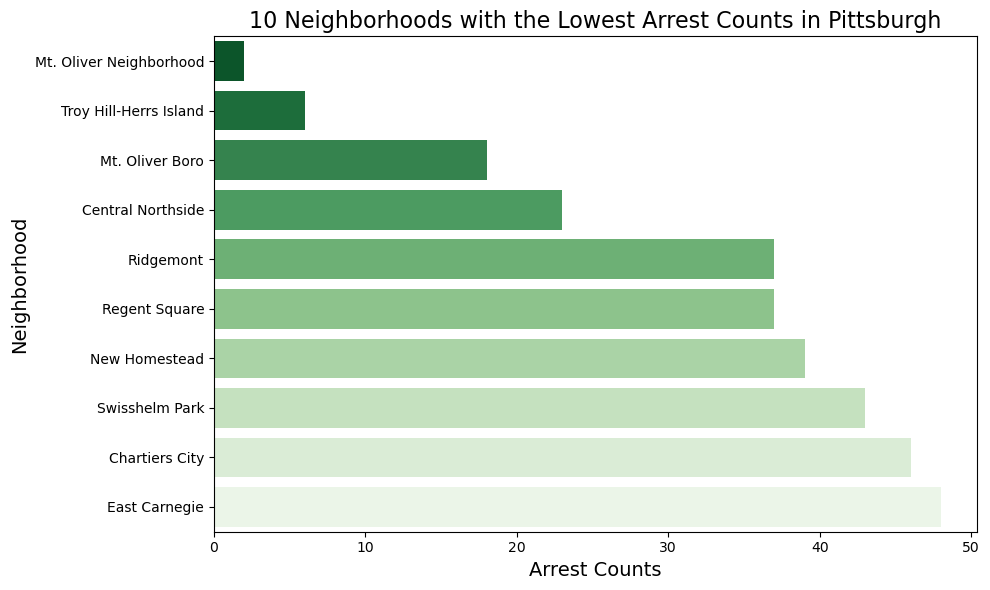

In [54]:
# Sort neighborhoods by arrest count and select the 10 with the lowest average arrests
lowest_10 = neighborhood_incident_counts.nsmallest(10, 'incident_count')

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lowest_10,
    y='INCIDENTNEIGHBORHOOD',
    x='incident_count',
    palette="Greens_r"
)
plt.title('10 Neighborhoods with the Lowest Arrest Counts in Pittsburgh', fontsize=16)
plt.xlabel('Arrest Counts', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.tight_layout()
plt.show()


In [52]:
#Create a Data Frame
df= pd.read_csv('Neighborhoods_with_SNAP_Data.csv')

#Remove the percent sign and convert type to float
df['Edu__Attainment__Bachelor_s_Deg'] = df['Edu__Attainment__Bachelor_s_Deg'].replace(r'[\%,]', '', regex=True).astype(float)

#Sort education decending from greatest to least
sortedIncome = df.sort_values(by='Edu__Attainment__Bachelor_s_Deg', ascending=False)

# Display the top 10 neighborhoods in terms of education(bachelor's degree)
print(sortedIncome[['Edu__Attainment__Bachelor_s_Deg','Neighborhood_2010_HOOD']].head(10))

    Edu__Attainment__Bachelor_s_Deg Neighborhood_2010_HOOD
55                             44.8         Allegheny West
4                              33.4         Strip District
57                             32.3              Shadyside
49                             30.5             Friendship
70                             28.3     Point Breeze North
14                             27.6       South Side Flats
1                              27.4          North Oakland
25                             27.4    Squirrel Hill South
87                             26.7               West End
65                             26.7    Squirrel Hill North


# Top 10 neighborhoods by education (Percent with at least a bachelors degree)
1. Allegheney west
2. Strip District
3. Shadyside
4. Friendship
5. Point Breeze North
6. Southside Flats
7. North Oakland
8. Squirell Hill South
9. West End
10. Squirell Hill NorthHill North

In [4]:
top_education_neighborhoods = sortedIncome[['Edu__Attainment__Bachelor_s_Deg', 'Neighborhood_2010_HOOD']].head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_education_neighborhoods,
    x='Edu__Attainment__Bachelor_s_Deg',
    y='Neighborhood_2010_HOOD',
    palette="Purples_r"
)
plt.title('Top 10 Neighborhoods by Bachelor\'s Degree Attainment', fontsize=16)
plt.xlabel('Bachelor\'s Degree Attainment (%)', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.tight_layout()
plt.show()


NameError: name 'sortedIncome' is not defined

In [20]:
#Create a Data Frame
dataFrame = pd.read_csv('AggregateIncome.csv')

#Turn the strings in the income column into numerics
dataFrame['estimate__aggregate_household_income_in_the_past_12_months__'] = pd.to_numeric(dataFrame['estimate__aggregate_household_income_in_the_past_12_months__'], errors='coerce')

#Sort income decending from greatest to least
sortedIncome = dataFrame.sort_values(by='estimate__aggregate_household_income_in_the_past_12_months__', ascending=False)

# Display the top 10 neighborhoods in terms of aggregate income
print(sortedIncome[['estimate__aggregate_household_income_in_the_past_12_months__','Neighborhood']].head(10))

    estimate__aggregate_household_income_in_the_past_12_months__  \
77                                        659886300.0              
68                                        605635700.0              
76                                        577467500.0              
13                                        366945900.0              
63                                        314958500.0              
53                                        267100700.0              
9                                         249898900.0              
39                                        242405400.0              
36                                        241377900.0              
72                                        233098400.0              

           Neighborhood  
77  Squirrel Hill South  
68            Shadyside  
76  Squirrel Hill North  
13            Brookline  
63         Point Breeze  
53     Mount Washington  
9            Bloomfield  
39        Highland Park  
36           Gree

## Top 10 Neighborhoods in Total Income
1. Squirell Hill South - 659,886,300
2. Shadyside - 605,635,700
3. Squirrel Hill North - 577,467,500
4. Brookline - 366,945,900
5. Point Breeze - 314,958,500
6. Mount Washington - 267,100,700
7. Bloomfield - 249,898,900
8. Highland Park - 242,405,400
9. Greenfield - 241,377,900
10. South Side Flats - 233,098,400

In [2]:
#Create a Data Frame
dataFrame = pd.read_csv('Neighborhoods_with_SNAP_Data.csv')

#Remove the dollar sign and convert type to float
dataFrame['SNAP_All_csv_Median_Home_Value_'] = dataFrame['SNAP_All_csv_Median_Home_Value_'].replace(r'[\$,]', '', regex=True).astype(float)

#Sort income decending from greatest to least
sortedIncome = dataFrame.sort_values(by='SNAP_All_csv_Median_Home_Value_', ascending=False)

# Display the top 10 neighborhoods in terms of median home value
print(sortedIncome[['SNAP_All_csv_Median_Home_Value_','Neighborhood_2010_HOOD']].head(10))

    SNAP_All_csv_Median_Home_Value_ Neighborhood_2010_HOOD
65                         254667.0    Squirrel Hill North
1                          222423.0          North Oakland
4                          215900.0         Strip District
34                         164000.0           Point Breeze
55                         159700.0         Allegheny West
57                         153560.0              Shadyside
25                         134633.0    Squirrel Hill South
49                         115600.0             Friendship
68                         113000.0          Regent Square
37                          99900.0          Highland Park


## Top 10 Neighborhoods by Median Home Value
1. Squirrel Hill North - 254,667
2. North Oakland - 222,423
3. Strip District - 215,900
4. Point Breeze - 164,000
5. Allegheny West - 159,700
6. Shadyside - 153,560
7. Squirrel Hill South - 134,633
8. Friendship - 115,600
9. Regent Square - 113,000
10. Highland Park - 99,900- 99,900

Each of these submetrics dictate the amount of wealth in the neighborhoods, which is an important thing to consider when picking a place to live. Low-income directly translates to crime, so you want to pick a place that is generally wealthy. This is important not only from a crime standpoint, but if also leads to better overall cleanliness, more shopping and food options, etc.

# Conclusion
The total ranking for the overall safest neighborhood was determined by how well-educated the area is, how many arrests there were, how much income there is in the area, and what the median home value is. This means that the neighborhood that ranks highest the most often would be considered the best. The rankings are shown here:
| Neighborhoods (Ranked)     | Total Points | Education | Median Home Value | Aggregate Income | Arrests |
|----------------------------|--------------|-----------|-------------------|------------------|---------|
| Shadyside                  | 22           | 3         | 6                 | 2                | 11      |
| Squirrel Hill North        | 25           | 10        | 1                 | 3                | 11      |
| Squirrel Hill South        | 27           | 8         | 7                 | 1                | 11      |
| Strip District             | 27           | 2         | 3                 | 11               | 11      |
| Allegheny West             | 28           | 1         | 5                 | 11               | 11      |
| North Oakland              | 31           | 7         | 2                 | 11               | 11      |
| Point Breeze               | 31           | 11        | 4                 | 5                | 11      |
| Mt. Oliver Neighborhood    | 34           | 11        | 11                | 11               | 1       |
| Friendship                 | 34           | 4         | 8                 | 11               | 11      |
| Troy Hill-Herrs Island     | 35           | 11        | 11                | 11               | 2       |
| Mt. Oliver Boro            | 36           | 11        | 11                | 11               | 3       |
| Brookline                  | 37           | 11        | 11                | 4                | 11      |
| Central Northside          | 37           | 11        | 11                | 11               | 4       |
| Regent Square              | 37           | 11        | 9                 | 11               | 6       |
| Point Breeze North         | 38           | 5         | 11                | 11               | 11      |
| South Side Flats           | 38           | 6         | 11                | 10               | 11      |
| Ridgemont                  | 38           | 11        | 11                | 11               | 5       |
| Mount Washington           | 39           | 11        | 11                | 6                | 11      |
| Highland Park              | 40           | 11        | 10                | 8                | 11      |
| Bloomfield                 | 40           | 11        | 11                | 7                | 11      |
| New Homestead              | 40           | 11        | 11                | 11               | 7       |
| Swisshelm Park             | 41           | 11        | 11                | 11               | 8       |
| West End                   | 42           | 9         | 11                | 11               | 11      |
| Greenfield                 | 42           | 11        | 11                | 9                | 11      |
| Chartiers City             | 42           | 11        | 11                | 11               | 9       |
| East Carnegie              | 43           | 11        | 11                | 11ide               | 10      |


This ranking was determined by adding the positions of each neighborhood from the top 10 of each submetric. If a neighborhood was not located on a specific list, it was automatically assigned an 11.

Based on each of our submetrics, the best neighborhood to live in in Pittsburgh is:
## Shadyside